### Importing Required Libraries

In [46]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings("ignore")

### Importing Datasets

In [47]:
train = pd.read_csv('/content/train.csv')
train_label = pd.read_csv('/content/train_label.csv')
test = pd.read_csv('/content/test.csv')
test_label = pd.read_csv('/content/test_label.csv')

### Viewing train and test data

In [48]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [49]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900


In [50]:
train_label.head()

,504
0,5
1,139
2,209
3,184
4,791


In [51]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [52]:
test.describe()

,holiday,workingday,temp,atemp,humidity,windspeed
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000
mean,0.028926,0.683196,20.182241,23.653214,62.835170,12.621496
std,0.167636,0.465337,7.704978,8.369721,19.401161,8.060062
min,0.000000,0.000000,3.280000,3.790000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,16.665000,48.000000,7.001500
50%,0.000000,1.000000,20.500000,24.240000,63.000000,11.001400
75%,0.000000,1.000000,26.240000,31.060000,78.000000,16.997900
max,1.000000,1.000000,38.540000,44.695000,100.000000,56.996900


In [53]:
test_label.head()

,256
0,87
1,11
2,84
3,668
4,53


### Adding train label to the train dataset

In [54]:
train_labels_list = [504] + list(train_label['504'])
if 'Cab Bookings' not in list(train.columns):
    train['Cab Bookings'] = train_labels_list 

### Adding test label to the test dataset

In [55]:
test_labels_list = [256] + list(test_label['256'])
if 'Cab Bookings' not in list(test.columns):
    test['Cab Bookings'] = test_labels_list 

## EDA and Visualisations on train data

### Dividing datetime column into WeekDay, Day, Time, Month, Year in train and test dataset 

In [56]:
#In train data
df = train.copy()
df['datetime'] = pd.to_datetime(df['datetime'])
datetime_list = ['WeekDay','Day','Time','Month','Year']
df['WeekDay'] = df['datetime'].apply(lambda x: x.strftime('%A'))
df['Day'] = df['datetime'].apply(lambda x: x.strftime('%d'))
df['Time'] = df['datetime'].apply(lambda x: x.strftime('%X'))
df['Month'] = df['datetime'].apply(lambda x: x.strftime('%B'))
df['Year'] = df['datetime'].apply(lambda x: x.strftime('%Y'))
df = df.drop('datetime',axis=1)

#In test data
test_df = test.copy()
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
datetime_list = ['WeekDay','Day','Time','Month','Year']
test_df['WeekDay'] = test_df['datetime'].apply(lambda x: x.strftime('%A'))
test_df['Day'] = test_df['datetime'].apply(lambda x: x.strftime('%d'))
test_df['Time'] = test_df['datetime'].apply(lambda x: x.strftime('%X'))
test_df['Month'] = test_df['datetime'].apply(lambda x: x.strftime('%B'))
test_df['Year'] = test_df['datetime'].apply(lambda x: x.strftime('%Y'))
test_df = test_df.drop('datetime',axis=1)

### Average Humidity, Recorded Temperature, Feels-like Temperature, Windspeed observed in each Season  

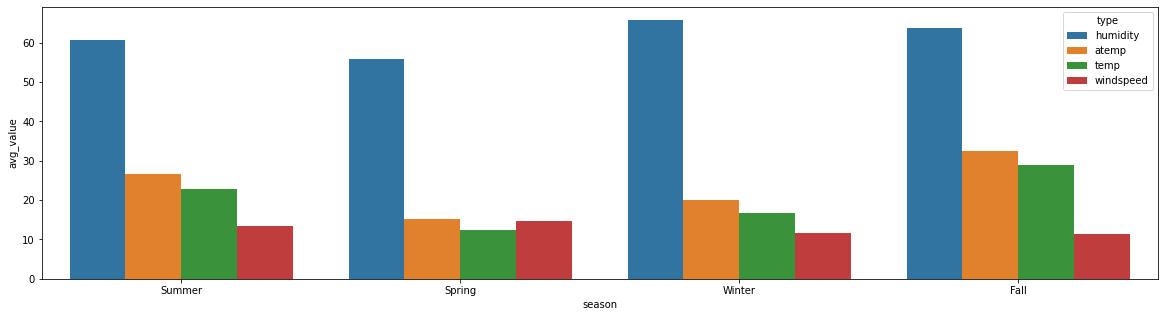

In [57]:
season_list = list(set(df['season']))
season_average_metric_list = []
for i in ['humidity','atemp','temp','windspeed']:
    average_metric_list = []
    average_metric_list.append(i)
    for j in season_list:
        avg_metric = df[df['season']==j][i].mean()
        average_metric_list.append(avg_metric)
    season_average_metric_list.append(average_metric_list)
season_average_metric_list = np.array(season_average_metric_list)
df_list = []
for i in range(len(season_list)):
    season_avg_df = pd.DataFrame({'season':season_list[i],'avg_value':season_average_metric_list[:,i+1],'type':season_average_metric_list[:,0]})
    df_list.append(season_avg_df)
season_avg_df = pd.concat(df_list)
season_avg_df.index = range(len(season_avg_df)) 
season_avg_df['avg_value'] = season_avg_df['avg_value'].astype(float)
#Plotting bar graph
sns.barplot(data=season_avg_df,x='season',y='avg_value',hue='type')

From above graph, We see that average humidity is highest during Winter, average temperature(both temp and atemp) is highest during Fall which is unexpected as one would think it should be in Summer and windspeed is highest during Spring. Feels like temperature(atemp) is higher than recorded temperature(temp) irrespective of the season. 

### Weathers observed in various Seasons

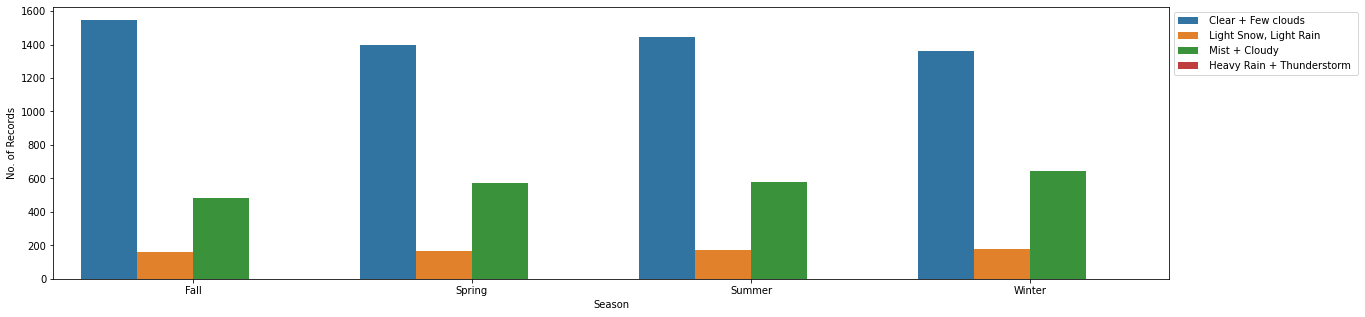

In [58]:
weather_season_df = df[['weather','season']]
weather_list = []
count_list = []
season_list = []
for season, weather_df in weather_season_df.groupby('season'):
    weather_count_dict = weather_df.groupby('weather').count()['season'].to_dict()
    keys = list(weather_count_dict.keys())
    weather_list.extend(keys)
    values = list(weather_count_dict.values())
    count_list.extend(values)
    season_list.extend([season]*len(keys))
weather_season_df = pd.DataFrame({'Season':season_list,'No. of Records':count_list,'Weather Type':weather_list})
#Plotting bar graph
sns.barplot(data = weather_season_df,x='Season',y='No. of Records',hue='Weather Type')
plt.legend(bbox_to_anchor=(1,1))

It appears that the most frequent weather observed in any season is Clear + Few clouds while Heavy Rain + Thunderstorm is rare phenomenon observed only during Spring. 

### Impact of Time on the number of Cab Bookings during Working days
One can hypothesize that cab bookings are higher during the employee working hours from 9 am to 6pm and less during sleeping hours 10pm to 6 am. Let us check this   

In [59]:
working_day_df = df[(df['holiday'] == 0)&(df['workingday'] == 1)][['Time','Cab Bookings']].sort_values(by='Time')
leaving_for_office_hours = ['07:00:00','08:00:00']
at_office_hours = ['09:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00']
going_to_home_hours = ['18:00:00','19:00:00','20:00:00','21:00:00']
sleeping_hours = ['22:00:00','23:00:00','00:00:00','01:00:00','02:00:00','03:00:00','04:00:00','05:00:00','06:00:00']
cab_bookings_list = []
duration_category = []
for i in list(working_day_df['Time']):
    if i in leaving_for_office_hours:
        duration_category.append("leaving for office")
    if i in at_office_hours:
        duration_category.append("at office")
    if i in going_to_home_hours:
        duration_category.append("going to home")
    if i in sleeping_hours:
        duration_category.append("sleeping")
if 'duration_category' not in list(working_day_df.columns):
    working_day_df['duration_category'] = duration_category

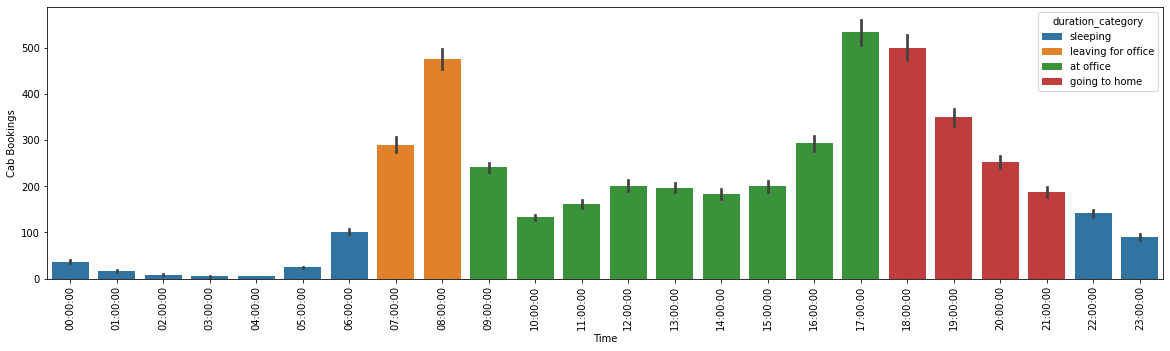

In [60]:
sns.barplot(data = working_day_df, x = 'Time',y = 'Cab Bookings',hue='duration_category',dodge=False)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = (10,3)

We can see that demands for cabs are lower during sleeping time durations while in other time durations demands are pretty high especially at 8:00, 17:00 and 18:00 time. A cab company can thus increase no. of cabs operating during going to home, leaving for office and at office hours and reduce it during sleeping hours 

### Impact of Time on the number of Cab Bookings during non-working days

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

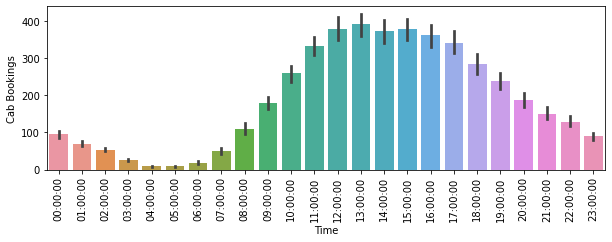

In [61]:
non_working_day_df = df[df['workingday'] == 0][['Time','Cab Bookings']].sort_values(by='Time')
sns.barplot(data=non_working_day_df,x='Time',y='Cab Bookings')
plt.rcParams['figure.figsize'] = (20,3)
plt.xticks(rotation=90)

Here we see that cabs booking follow a perfect sinusoidal demand curve over the period of 24 hrs. Unlike normal working days where demand for cabs reaches peak in the early morning and evening time. Here, we see that peak demand is reached at later in the day, and remains consistent in the afternoon time between 12-5pm. This can be because since it's an off-day, people might wake up late, go for city tours or travel to picnics, malls during the afternoon time.  

### Monthly comparison Year-wise on the number of Cab Bookings  

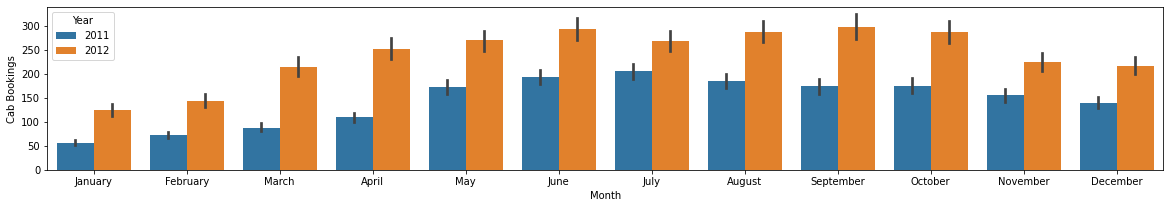

In [62]:
def month_val(month):
    month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
                  'October':10,'November':11,'December':12}
    return month_dict[month]
month_df = df[['Month','Cab Bookings','Year']]
month_df['Month_val']= month_df['Month'].apply(lambda x:month_val(x))
sns.barplot(data = month_df.sort_values(by='Month_val'), x = 'Month',y = 'Cab Bookings',hue='Year')
plt.rcParams['figure.figsize'] = (20,3)

We observe an approximate 1.5-2x increase in no. of bookings in each month of the year. A general trend is observed here that number of cab gradually increases, reaches peak during mid-year and gradually decreases as it nears the end of the year. This can be explained due to Summer Vacations that happens during the mid-year (May - July), hence resulting in gradual rise in bookings and as the Vacations ends, people resume back to work thus gradually decrasing afterwards. Let us verify this insight by looking at seasonal variations in Cab Bookings

### Effect of Seasons on the Cab Bookings

Summer: {'May', 'June', 'April'}
Fall: {'August', 'September', 'July'}
Spring: {'February', 'January', 'March'}
Winter: {'October', 'November', 'December'}


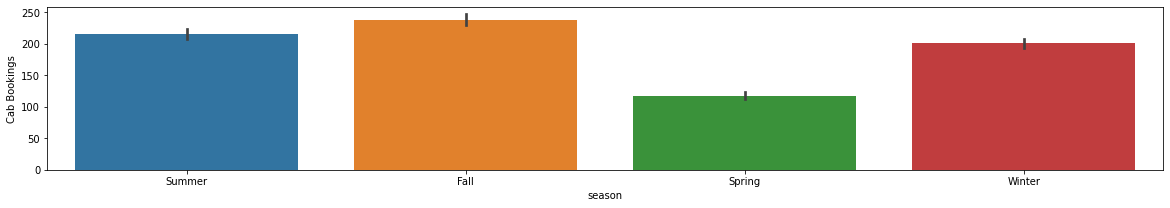

In [63]:
season_df = df[['season','Cab Bookings','Month']]
sns.barplot(data = season_df,x = 'season',y = 'Cab Bookings')
print("Summer:",set(season_df[season_df['season']=='Summer']['Month']))
print("Fall:",set(season_df[season_df['season']=='Fall']['Month']))
print("Spring:",set(season_df[season_df['season']=='Spring']['Month']))
print("Winter:",set(season_df[season_df['season']=='Winter']['Month']))
plt.rcParams['figure.figsize'] = (10,3)

The above insight is thus verified. We can see that during Summer and Fall Car bookings are over and above 200 across two years. Hence, Summer and Fall are the periods seeing higher surge in Cab Bookings due to Vacations.

### Effect of feels-like temperature and actual temperature absolute difference on Cab bookings 
Let us examine whether atemp and temp absolute difference impacts our Cab bookings in any possible way

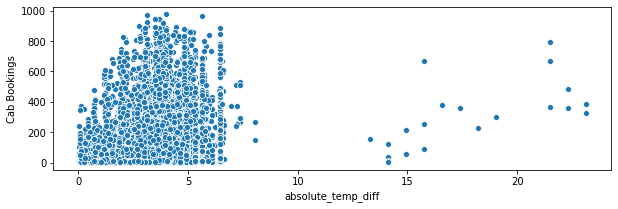

In [64]:
temperature_df = df[['temp','atemp','Cab Bookings']]
temperature_df['absolute_temp_diff'] = np.abs(temperature_df['atemp'] - temperature_df['temp'])
sns.scatterplot(data=temperature_df,x='absolute_temp_diff',y='Cab Bookings')
plt.rcParams['figure.figsize'] = (10,3)

We see that having a lower absolute temperature difference between 0-7.5 units is favourable as majority of Cab Bookings have taken place in this region. Higher absolute temperature difference is associated with very fewer bookings. Bear in mind that correlation does not imply causation. This is just an association observed.   

### Effects of Humidity and Weather on Cab Bookings 

In [65]:
weather_df = df[['weather','Cab Bookings']]
weather_list = list(set(weather_df['weather']))
weather_count_list = []
for i in weather_list:
    weather_count_list.append(len(df[df['weather']==i]))
pd.DataFrame({'weather':weather_list,'weather_count':weather_count_list})

,weather,weather_count
0,Clear + Few clouds,5753
1,"Light Snow, Light Rain",678
2,Mist + Cloudy,2276
3,Heavy Rain + Thunderstorm,1


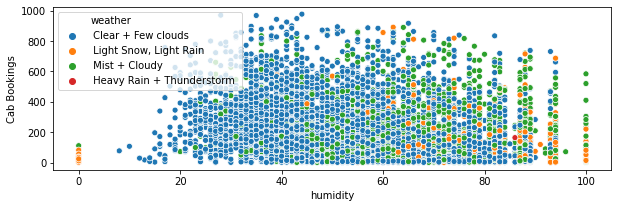

In [66]:
humidity_df = df[['humidity','weather','Cab Bookings']]
sns.scatterplot(data = humidity_df,x='humidity',y='Cab Bookings',hue='weather')
plt.rcParams['figure.figsize'] = (30,5)

Humidity appears to have little to no correlation as people are booking cabs over large ranges of Humidity. It also appears that most of the Cab Bookings have taken place during Clear + Few Clouds, Mist + Cloudy weather. Makes sense because we can see in the above data that very few records are available for Light to Heavy rain, especially Heavy rain/thunderstorm since it's a rare phenomenon.  

### Effects of  Windspeed on Cab Bookings

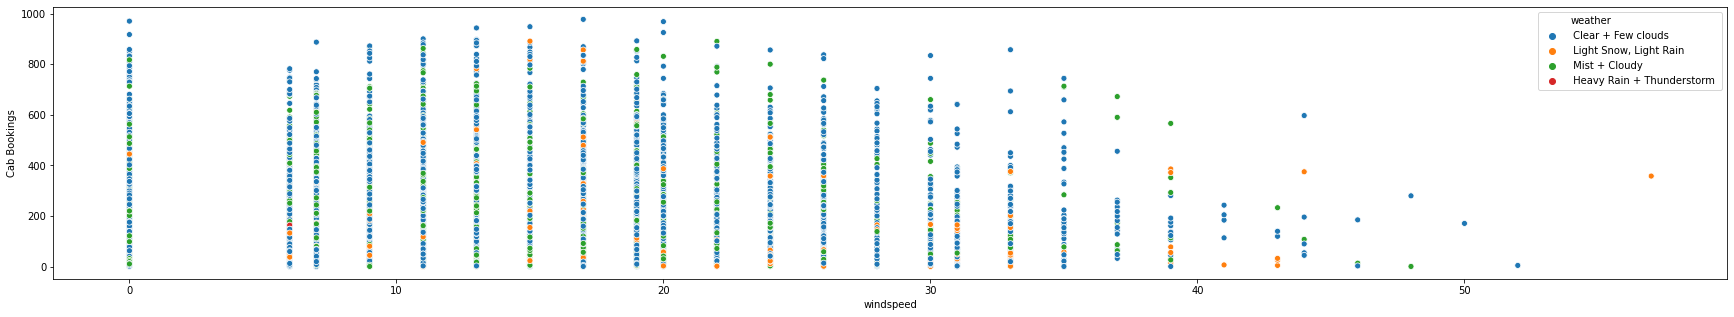

In [67]:
windspeed_df = df[['windspeed','Cab Bookings','weather']]
sns.scatterplot(data = windspeed_df,x='windspeed',y='Cab Bookings',hue='weather')
plt.rcParams['figure.figsize'] = (20,5)

Here, windspeed also appears to have little to no correlation on Cab Bookings

## Outlier Treatment

### Before Outlier Treatment

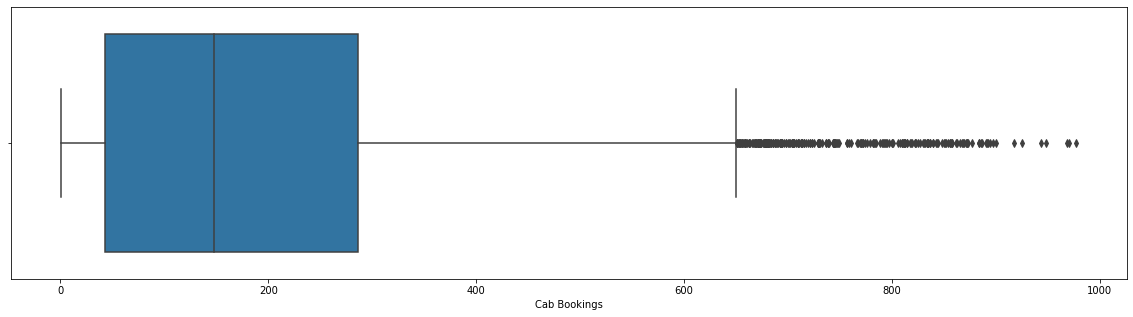

In [68]:
#For train data
plot_data = sns.boxplot(x = df['Cab Bookings'])

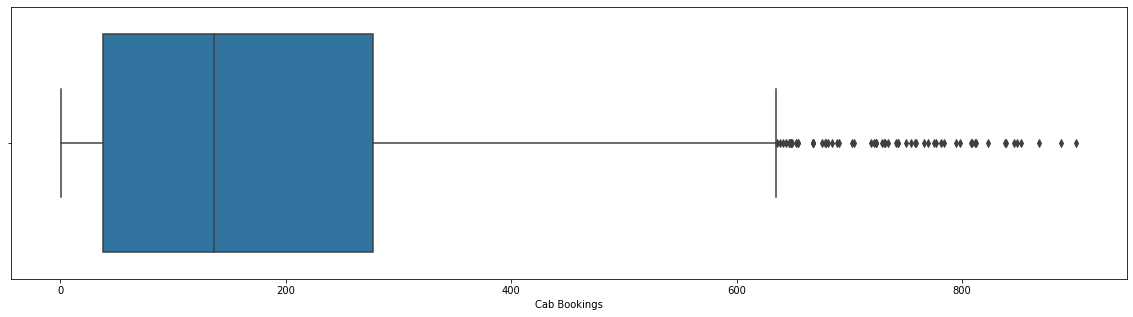

In [69]:
#For test data
sns.boxplot(x = test_df['Cab Bookings'])

### Method 1: Transformation

Let us plot a frequency distribution plot. Generally, regression models perform well on balanced(non - skewed) and normally distributed data. This skewness is caused due to presence of outliers.  

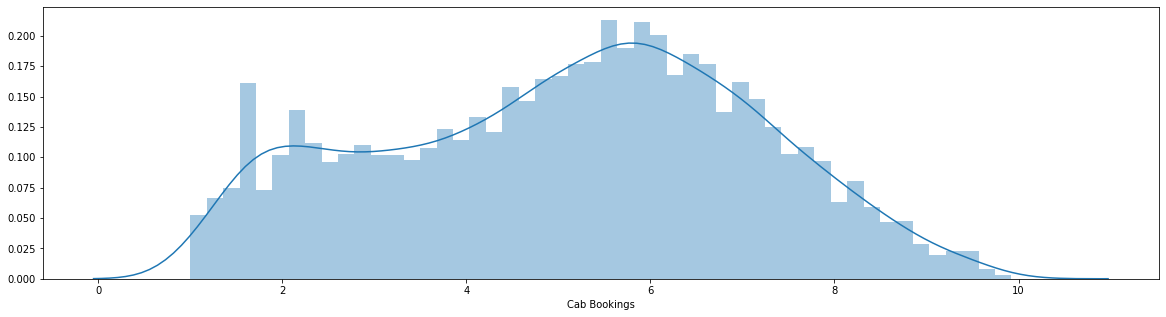

In [70]:
#For train data
sns.distplot(np.cbrt(df['Cab Bookings']),bins=50)

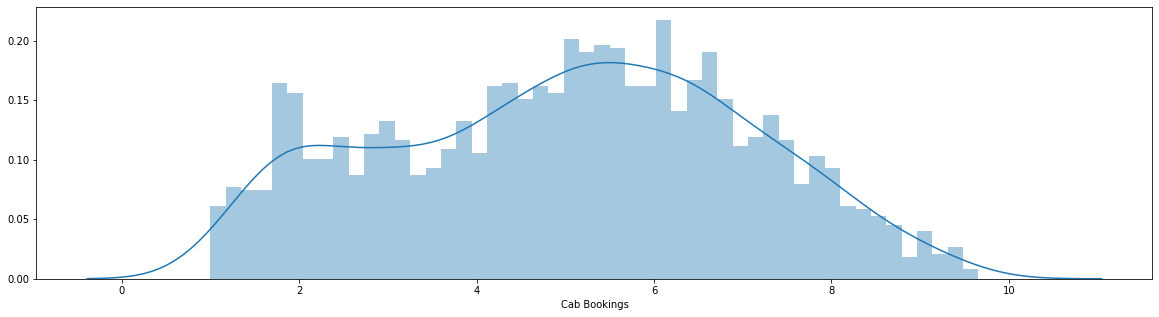

In [71]:
#For test data
sns.distplot(np.cbrt(test_df['Cab Bookings']),bins=50)

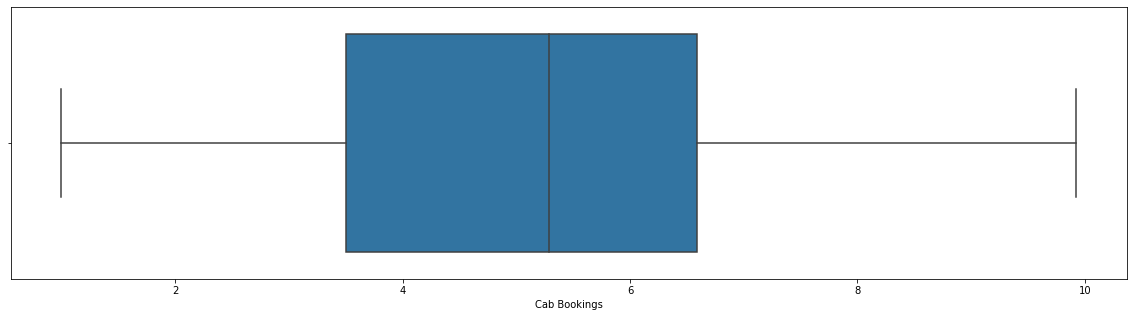

In [72]:
#For train data
plot_data = sns.boxplot(x = np.cbrt(df['Cab Bookings']))

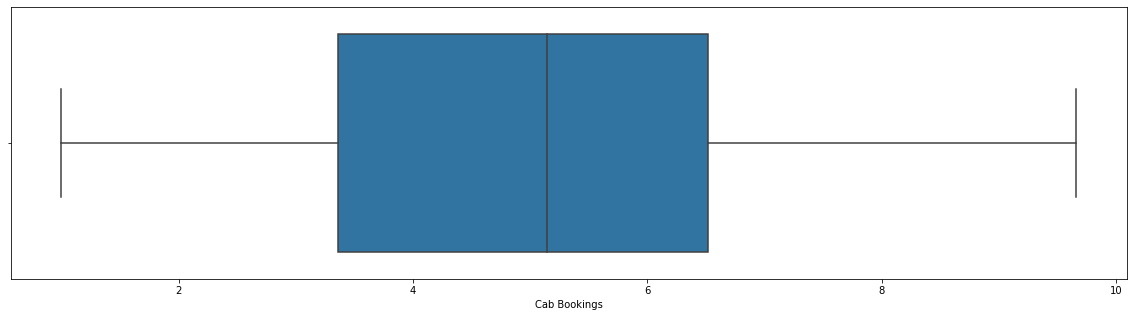

In [73]:
#For test data
sns.boxplot(x = np.cbrt(test_df['Cab Bookings']))

We see that outliers are removed after transforming the target variable

In [74]:
new_train = df.copy()
new_train['Cab Bookings'] = np.cbrt(new_train['Cab Bookings']) 

### Method 2: Removing Outliers through IQR Method

In the before transformation section, We see that above 600, the values are an outliers that can negatively impact the regression models. Through hit and trial, it was observed that below 608 for train data and below 590 for test data, we obtain a clean boxplot.

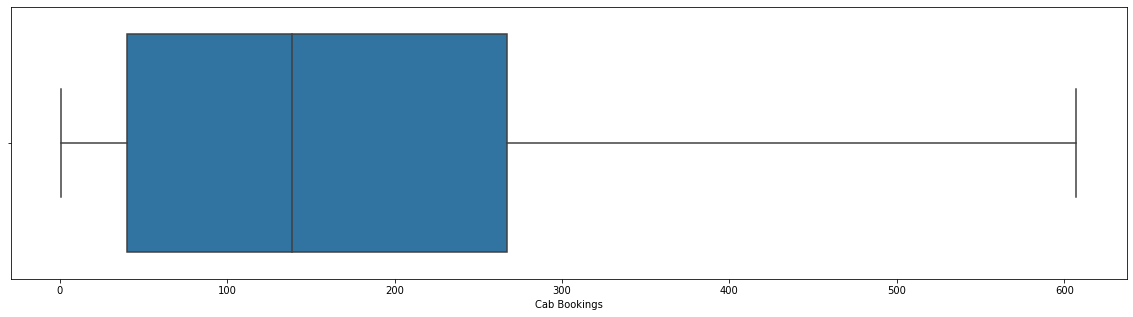

In [75]:
#For train data
plot_data = sns.boxplot(x = df[df['Cab Bookings']<608]['Cab Bookings'])

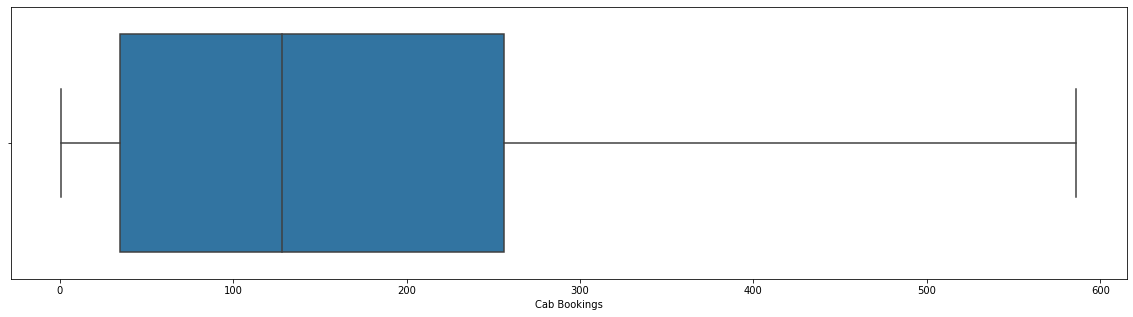

In [76]:
#For test data
sns.boxplot(x = test_df[test_df['Cab Bookings']<590]['Cab Bookings'])

In [77]:
new_train = df[df['Cab Bookings']<608]
new_test = test_df[test_df['Cab Bookings']<590]

## Which method to choose here?
Both the above methods are good for removing outliers to help provide better predictions in the model. Here Method 1: Transformation is preferred because it doesn't result in the loss of data like Method 2, which can cause underfitting on the test data, both of which are against our objectives 

In [78]:
new_train = df.copy()
new_train['Cab Bookings'] = np.cbrt(new_train['Cab Bookings']) 
new_test = test_df.copy()
new_test['Cab Bookings'] = np.cbrt(new_test['Cab Bookings'])

## Missing Value Treatment

### Checking for null records

In [79]:
new_train.isnull().sum()

season          0
holiday         0
workingday      0
weather         0
temp            0
atemp           0
humidity        0
windspeed       0
Cab Bookings    0
WeekDay         0
Day             0
Time            0
Month           0
Year            0
dtype: int64

In [80]:
new_test.isnull().sum()

season          0
holiday         0
workingday      0
weather         0
temp            0
atemp           0
humidity        0
windspeed       0
Cab Bookings    0
WeekDay         0
Day             0
Time            0
Month           0
Year            0
dtype: int64

We see that there's no need for missing value treatment as datasets does not have null values

## Correlation Analysis & Feature Engineering
We have already done some correlation between various features and generated some interesting insights in EDA and Visualisation Section. Let us look further through the heatmap and perform some Feature Engineering

In [81]:
def weekday_val(weekday):
    weekday_dict = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
    return weekday_dict[weekday]
def month_val(month):
    month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
                  'October':10,'November':11,'December':12}
    return month_dict[month]
#For train data
new_train['Month'] = new_train['Month'].apply(lambda x:month_val(x))
new_train['WeekDay'] = new_train['WeekDay'].apply(lambda x:weekday_val(x))
new_train['weather'] = LabelEncoder().fit_transform(new_train['weather'])
new_train['season'] = LabelEncoder().fit_transform(new_train['season'])
new_train['Hour'] = new_train['Time'].apply(lambda x:int(x[:2]))
#For test data
new_test['Month'] = new_test['Month'].apply(lambda x:month_val(x))
new_test['WeekDay'] = new_test['WeekDay'].apply(lambda x:weekday_val(x))
new_test['weather'] = LabelEncoder().fit_transform(new_test['weather'])
new_test['season'] = LabelEncoder().fit_transform(new_test['season'])
new_test['Hour'] = new_test['Time'].apply(lambda x:int(x[:2]))

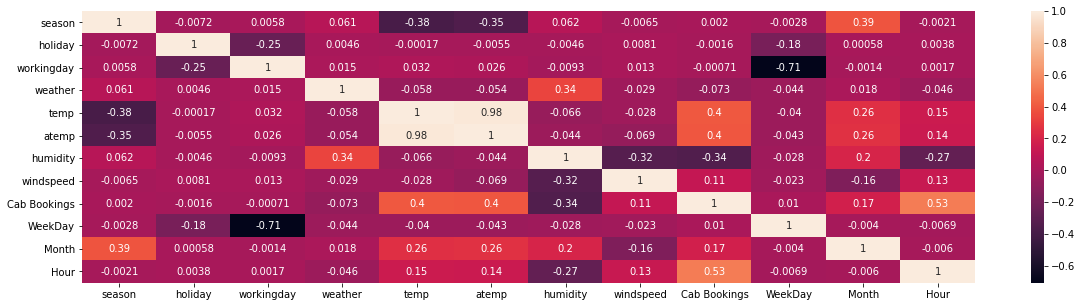

In [82]:
sns.heatmap(new_train.corr(),annot=True)

Let us take all those features whose first two both decimal places are not zero. The selected
features are: **Hour**, **temp**, **Month**, **humidity**, **windspeed**, **atemp**, **windspeed**, **WeekDay**, **weather**. We know that many features here other than **hour**, **temp** may not look significantly correlating. But the subset selection among these features in the next step will take care of selecting required features to maximize the test r2 score depending on the model.  

In [83]:
X_train = new_train[['Hour','temp','Month','humidity','windspeed','atemp','windspeed','WeekDay','weather']]
Y_train = new_train['Cab Bookings']
X_test = new_test[['Hour','temp','Month','humidity','windspeed','atemp','windspeed','WeekDay','weather']]
Y_test = new_test['Cab Bookings']

## Model Selection, Testing, Tuning & Boosting

### Backward Stepwise Subset Selection amongst the selected features to maximize their R2-score for each model

Here **Hour**, **temp** are significantly correlated with the target variable. So these two will remain constant in the entire feature Set.  

In [84]:
def subset_selection(model,X_train,Y_train,X_test,Y_test):
  features = list(X_train.columns)
  constant_features = features[:2]
  model.fit(X_train,Y_train)
  initial_score = r2_score(Y_test,model.predict(X_test))
  features_to_test = features[2:]
  sel_features = features.copy()
  while(features_to_test!=[]):
    feature_diff_dict = {}  
    for i in features_to_test:
        sel_features.remove(i)
        model.fit(X_train[sel_features],Y_train)
        score = r2_score(Y_test, model.predict(X_test[sel_features]))
        diff = score - initial_score
        sel_features.append(i)
        feature_diff_dict[i] = diff
    keys = list(feature_diff_dict.keys())
    values = list(feature_diff_dict.values())
    if(max(values)>=0):
        best_feature = keys[values.index(max(values))]
        initial_score += feature_diff_dict[best_feature]
        sel_features.remove(best_feature)
        features_to_test.remove(best_feature)
    else:
        break
  return sel_features

### Performing GridSearch to find optimal model parameters  

In [85]:
#List of selected features for each model 
feature_list = []

In [86]:
#Linear Regression
lin_reg = LinearRegression()
features = subset_selection(lin_reg,X_train,Y_train,X_test,Y_test)
feature_list.append(features)

In [87]:
#Random Forest
rf = RandomForestRegressor()
param = {'n_estimators':[100],'random_state':list(range(11)),'max_features':[1,2,3,4,5,6,7,8,9]}
rf_gridsearch = GridSearchCV(rf,param_grid=param,n_jobs=-1,cv=5)
features = subset_selection(rf,X_train,Y_train,X_test,Y_test)
feature_list.append(features)
rf_gridsearch.fit(X_test[features],Y_test)
rf_gridsearch.best_params_

{'max_features': 9, 'n_estimators': 100, 'random_state': 10}

In [88]:
#SVR
svr = SVR(kernel='rbf')
param = {'kernel':['rbf'],'gamma':[0.01,0.1,1],'C':[0.01,0.1,1,10]}
svr_gridsearch = GridSearchCV(svr,param_grid = param,n_jobs=-1,cv=5)
features = subset_selection(svr,X_train,Y_train,X_test,Y_test)
feature_list.append(features)
svr_gridsearch.fit(X_test[features],Y_test)
svr_gridsearch.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [89]:
#Decision Tree
dtr = DecisionTreeRegressor()
param = {'max_features':[1,2,3,4,5,6,7,8,9],'random_state':list(range(11))}
dtr_gridsearch = GridSearchCV(dtr,param_grid = param,n_jobs=-1,cv=5)
features = subset_selection(dtr,X_train,Y_train,X_test,Y_test)
feature_list.append(features)
dtr_gridsearch.fit(X_test[features],Y_test)
dtr_gridsearch.best_params_

{'max_features': 9, 'random_state': 8}

In [90]:
#GradientBoosting Regression
gbr = GradientBoostingRegressor()
param = {'n_estimators':[50,100,200],'random_state':list(range(11)),'learning_rate':[0.01,0.1,1]}
gbr_gridsearch = GridSearchCV(gbr,param_grid = param,n_jobs=-1,cv=5)
features = subset_selection(gbr,X_train,Y_train,X_test,Y_test)
feature_list.append(features)
gbr_gridsearch.fit(X_test[features],Y_test)
gbr_gridsearch.best_params_

{'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 1}

In [100]:
#Result of gridsearch
rf = RandomForestRegressor(max_features=9,n_estimators=100,random_state=10)
svr = SVR(C=1,gamma=0.1,kernel='rbf')
dtr = DecisionTreeRegressor(max_features=9,random_state=8)
gbr = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 200, random_state = 1)

In [101]:
#fitting with subset selection
models = [lin_reg,rf,svr,dtr,gbr]
for model,features in zip(models,feature_list):
    model.fit(X_train[features],Y_train)

In [102]:
print("Features selected for models:")
print("Linear Regression:",feature_list[0])
print("Random Forest Regression:",feature_list[1])
print("Support Vector Regression:",feature_list[2])
print("Decision Tree Regression:",feature_list[3])
print("Gradient Boosting Regression:",feature_list[4])

Features selected for models:
Linear Regression: ['Hour', 'temp', 'Month', 'humidity', 'atemp', 'WeekDay', 'weather']
Random Forest Regression: ['Hour', 'temp', 'Month', 'humidity', 'windspeed', 'windspeed', 'WeekDay']
Support Vector Regression: ['Hour', 'temp', 'Month', 'WeekDay', 'weather']
Decision Tree Regression: ['Hour', 'temp', 'Month', 'humidity', 'windspeed', 'windspeed', 'WeekDay']
Gradient Boosting Regression: ['Hour', 'temp', 'Month', 'humidity', 'windspeed', 'atemp', 'windspeed', 'WeekDay']


In [103]:
models = [lin_reg,rf,svr,dtr,gbr]
r2_score_train_list = []
r2_score_test_list = []
modelname = ['LinearRegression','RandomForest','SVR','DecisionTree','GradientBoosting']
for model,name,feature in zip(models,modelname,feature_list):
    test_r2_score = r2_score(model.predict(X_test[feature]),Y_test)
    train_r2_score = r2_score(model.predict(X_train[feature]),Y_train)
    r2_score_train_list.append(train_r2_score)
    r2_score_test_list.append(test_r2_score)
model_score_df = pd.DataFrame({'Model':modelname,'train_score':r2_score_train_list,'test_score':r2_score_test_list})
model_score_df

,Model,train_score,test_score
0,LinearRegression,-0.206075,-0.147737
1,RandomForest,0.986548,0.905388
2,SVR,0.902468,0.871457
3,DecisionTree,0.999916,0.841280
4,GradientBoosting,0.891315,0.887752


We see above that Ensemble Model Random Forest performs the best among the four models. Desicion Tree as always causes overfitting of train data, causes less score on test dataset. Linear Regression Model is performing very poorly due to underfitting, let us try improving its score by adding polynomial features.   

### Finding the optimal Polynomial Degree for Linear Regression to maximize the test R2-score  


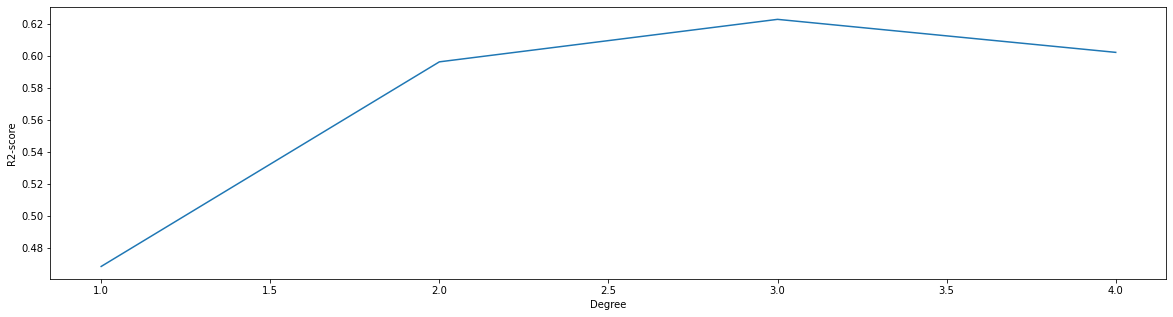

In [106]:
r2_score_list = []
degree_list = list(range(1,5))
for i in degree_list:
  lin_train = PolynomialFeatures(i).fit_transform(X_train)
  lin_reg.fit(lin_train,Y_train)
  lin_test = PolynomialFeatures(i).fit_transform(X_test)
  r2score = r2_score(Y_test,lin_reg.predict(lin_test))
  r2_score_list.append(r2score)
poly_lin_reg_df = pd.DataFrame({'R2-score':r2_score_list,'Degree':degree_list})
sns.lineplot(data=poly_lin_reg_df,x='Degree',y='R2-score')

We see that after degree = 3, test R2-score starts falling. So,we will choose degree = 3.


In [107]:
lin_train = PolynomialFeatures(3).fit_transform(X_train)
lin_reg.fit(lin_train,Y_train)
lin_test = PolynomialFeatures(3).fit_transform(X_test)
test_r2score = r2_score(Y_test,lin_reg.predict(lin_test))
train_r2score = r2_score(Y_train,lin_reg.predict(lin_train))
model_score_df.loc[0,['train_score','test_score']] = [train_r2score,test_r2score]
model_score_df

,Model,train_score,test_score
0,LinearRegression,0.685586,0.622946
1,RandomForest,0.986548,0.905388
2,SVR,0.902468,0.871457
3,DecisionTree,0.999916,0.841280
4,GradientBoosting,0.891315,0.887752


**CONCLUSION:** We performed the best practices in ML data analysis, experimented with many models in this project. After optimizing all these Regression Models to their finest level, We saw that RandomForest Model performs the best and Decision Tree performs the worst. Every model is a good fit except Decision Tree, since it's a greedy algorithm prone to overfitting. Other than this, we performed some nice visualizations and generated some interesting insights from the data too. Overall it was really a nice learning experience.